<a href="https://colab.research.google.com/github/dtg-ca/DataScience-the-journey-begins/blob/master/NLP_tf_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

print(tf.__version__)

2.6.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2021-09-19 10:40:54--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2021-09-19 10:40:54 (28.1 MB/s) - ‘moore.csv’ saved [2302/2302]



In [4]:
df = pd.read_csv('moore.csv',header=None)
df.head()

,0,1
0,1971,2300
1,1972,3500
2,1973,2500
3,1973,2500
4,1974,4100


In [6]:
X = df.values[:,0].reshape(-1,1)
y = df.values[:,1]

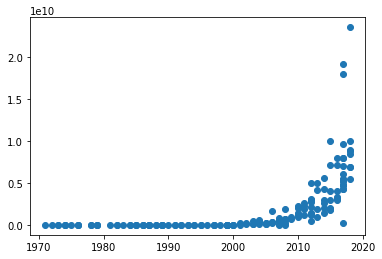

In [7]:
plt.scatter(X,y)

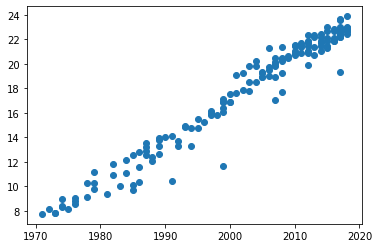

In [8]:
y = np.log(y)

plt.scatter(X,y)

In [9]:
X = X - X.mean()

In [12]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape =(1,)))
model.compile(optimizer = tf.keras.optimizers.SGD(0.001,0.9), loss ='mse')

def schedule(epoch, lr):
  if lr >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

r = model.fit(X, y, epochs = 200, callbacks = [scheduler])

Epoch 1/200
6/6 [==============================] - 1s 3ms/step - loss: 374.2863
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 337.4576
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 282.7376
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 209.3329
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 147.2539
Epoch 6/200
6/6 [==============================] - 0s 3ms/step - loss: 136.7895
Epoch 7/200
6/6 [==============================] - 0s 3ms/step - loss: 91.7352
Epoch 8/200
6/6 [==============================] - 0s 4ms/step - loss: 75.8648
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 58.0643
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 37.9118
Epoch 11/200
6/6 [==============================] - 0s 6ms/step - loss: 44.1946
Epoch 12/200
6/6 [==============================] - 0s 3ms/step - loss: 27.8877
Epoch 13/200
6/6 [=========================

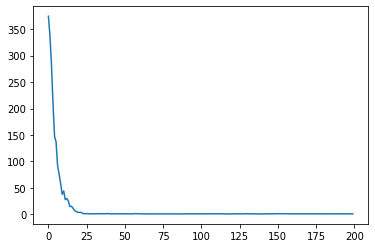

In [13]:
plt.plot(r.history['loss'], label = 'loss')

In [14]:
print(model.layers)

In [19]:
print(model.layers[0].get_weights()[0][0,0])

0.3467866
